#Submitted By: Niranjan Pandey

##CodSoft

#Question No. 1
#TITANIC SURVIVAL PREDICTION

 **Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.**

In [307]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
file_path = '/content/drive/MyDrive/CodSoft/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [310]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives us insight of the types of data. We have to convert the string value into integer. For example: We have to convert the categorical value such as Sex(male and female) into integer with male represented as 0 and female represented as 1 or vice versa.

In [312]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives us the statistical information of the data. We get the information that the age column has missing values. This gives us insight about the numerical data. We can fill the NaN value in age series with the mean.

##EDA

##Categorical Attributes

<Axes: xlabel='Survived', ylabel='count'>

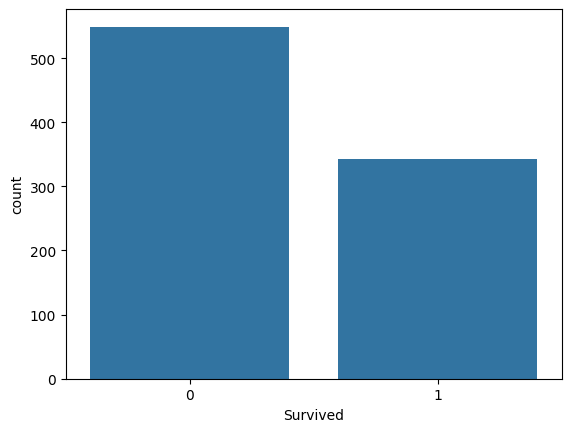

In [313]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

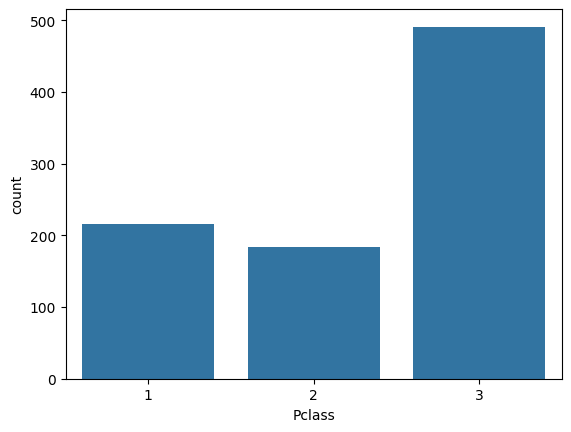

In [314]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Sex', ylabel='count'>

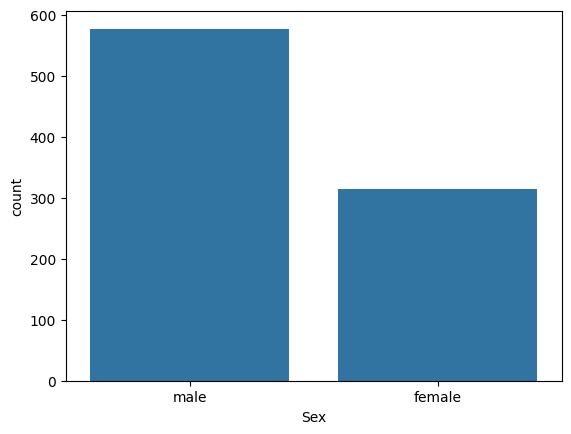

In [315]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='SibSp', ylabel='count'>

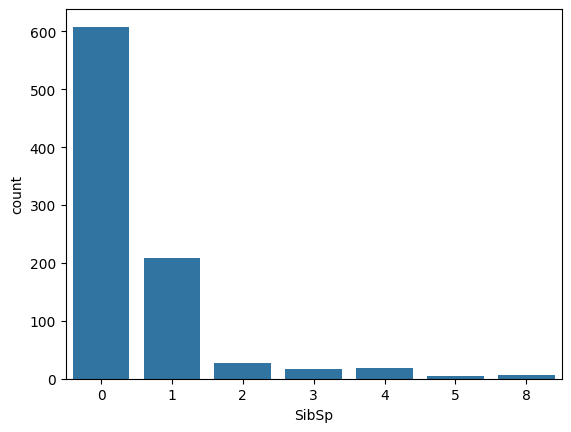

In [316]:
sns.countplot(x='SibSp', data=df)

This plot represents the number of siblings and spouse. Around 600 people didn't have siblings or spouse, 200 people have 1 siblings or spouse and so on. This data might be bias to 0.

<Axes: xlabel='Parch', ylabel='count'>

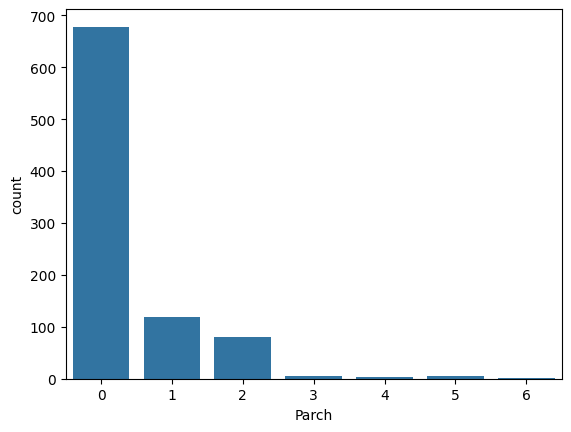

In [317]:
sns.countplot(x='Parch', data=df)

This plot represents the number of parents or children. Nearly 700  people didn't have parents or children, 100 people have 1 parents or children and so on. This data might be bias to 0.

In [318]:
df['Fam'] = df['Parch'] + df['SibSp']
df['Fam']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Fam, Length: 891, dtype: int64

<Axes: xlabel='Fam', ylabel='count'>

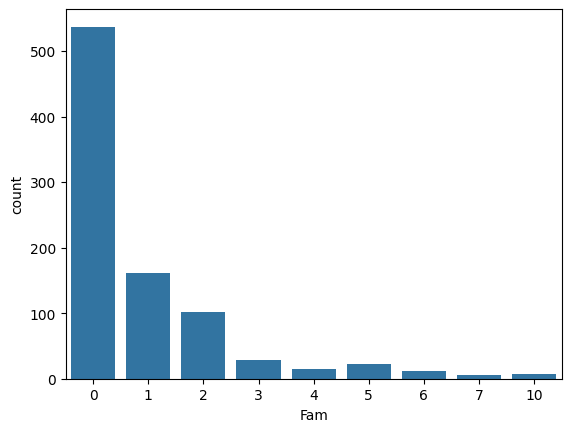

In [319]:
sns.countplot(x='Fam', data=df)

I thought the bias towards 0 would be reduced a bit after the total count of the family. It's better than Parch and SibSp but not considerably good as well.

<Axes: xlabel='Embarked', ylabel='count'>

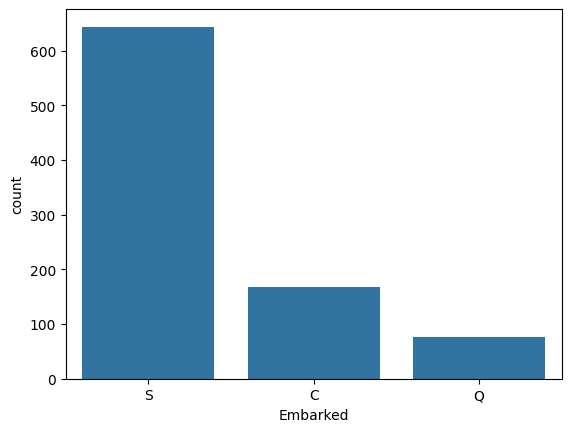

In [320]:
sns.countplot(x='Embarked', data=df)

Port of Embarkation : C = Cherbourg, Q = Queenstown, S = Southampton. Around 650 have embarked from Southampton, nearly 200 from Cherbourg and around 100 from Queenstown. We have to convert city initials into integers for processing.

##Numerical Attributes

<Axes: xlabel='Age', ylabel='Count'>

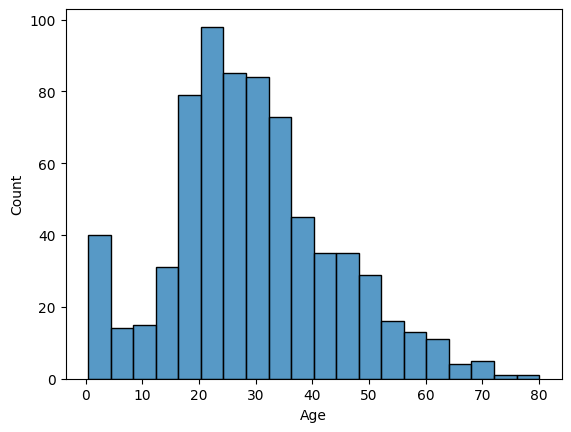

In [321]:
sns.histplot(df['Age'])


Age is normally distributed with a little bit of right skew.

<Axes: xlabel='Fare', ylabel='Count'>

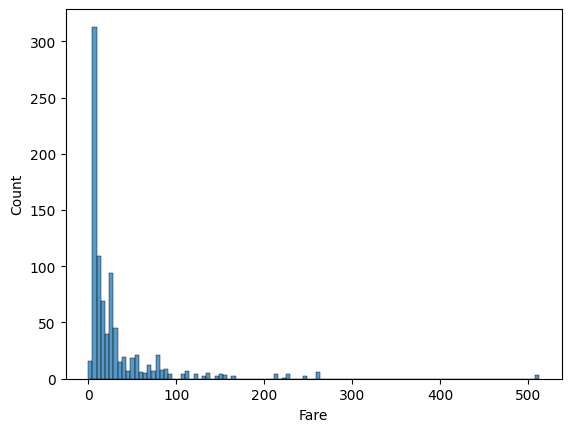

In [322]:
sns.histplot(df['Fare'])

Fare is fairly right skewed so we have to do preprocessing on the Fare to convert it uniform distribution as much as possible.

In [323]:
LogFare = np.log(df['Fare']+1) # Adding 1 to avoid zero values

<Axes: xlabel='Fare', ylabel='Count'>

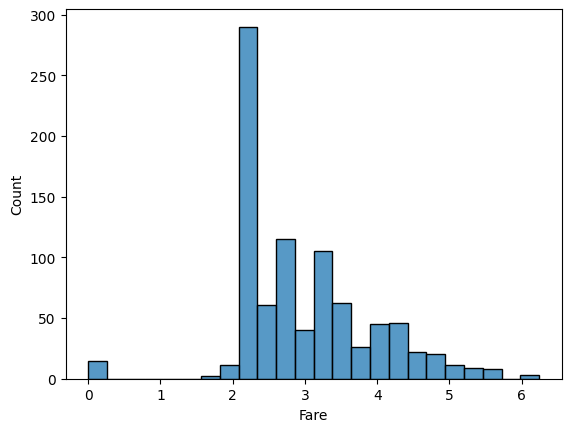

In [324]:
sns.histplot(LogFare)

In [325]:
SqrtFare = np.sqrt(df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

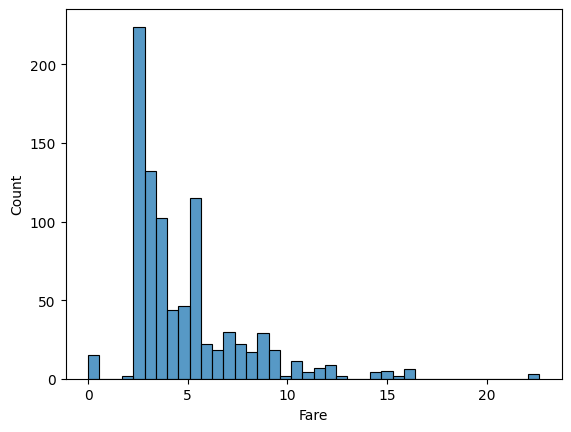

In [326]:
sns.histplot(SqrtFare)

In [327]:
from scipy import stats

In [328]:

transformed_data, lambda_value = stats.boxcox(df['Fare'] + 1)  # Adding 1 to avoid zero values
BoxCoxFare = transformed_data


<Axes: ylabel='Count'>

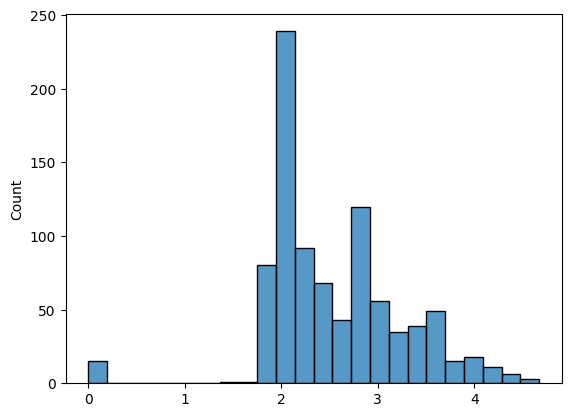

In [329]:
sns.histplot(BoxCoxFare)

In [330]:
df['Fare']= LogFare

 One common approach to hand right-skewed data is to use a logarithmic transformation. I researched about more transformation just to explore if I could get better results but logarithmic transformation is fairly good though not perfect. Other two ie. Square root and Box Cox do not perform exceptionally well as well. I think log transformation is good to use here.

In [331]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Fam              0
dtype: int64

Here, we can see that 177 of age data is null so we can fill them with mean value of age. 687 of the cabin value is null so the cabin series is probably useless to us. We have 2 null values in Embarked which can be filled with mode.

In [332]:
df = df.drop(columns = ['Cabin', 'Name'], axis = 1)

In [333]:
df = df.drop(columns=['PassengerId', 'Ticket'], axis = 1)

In [334]:
df = df.drop(columns=['SibSp', 'Parch'], axis = 1)

Since, we have already made the Fam column, we don't need SibSp and Parch column.

In [335]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

We fill the null value in age column with the mean value of age column since age is the numerical value.

In [336]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

We fill the null value in embarked column with the mode value of embarked column since embarked has the categorical value.

In [337]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [338]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam
0,0,3,1,22.0,2.110213,2,1
1,1,1,0,38.0,4.280593,0,1
2,1,3,0,26.0,2.188856,2,0
3,1,1,0,35.0,3.990834,2,1
4,0,3,1,35.0,2.202765,2,0


As I had mentioned earlier, Sex and Embarked are categorical data with string values so we have to convert them to integer for processing.

<Axes: >

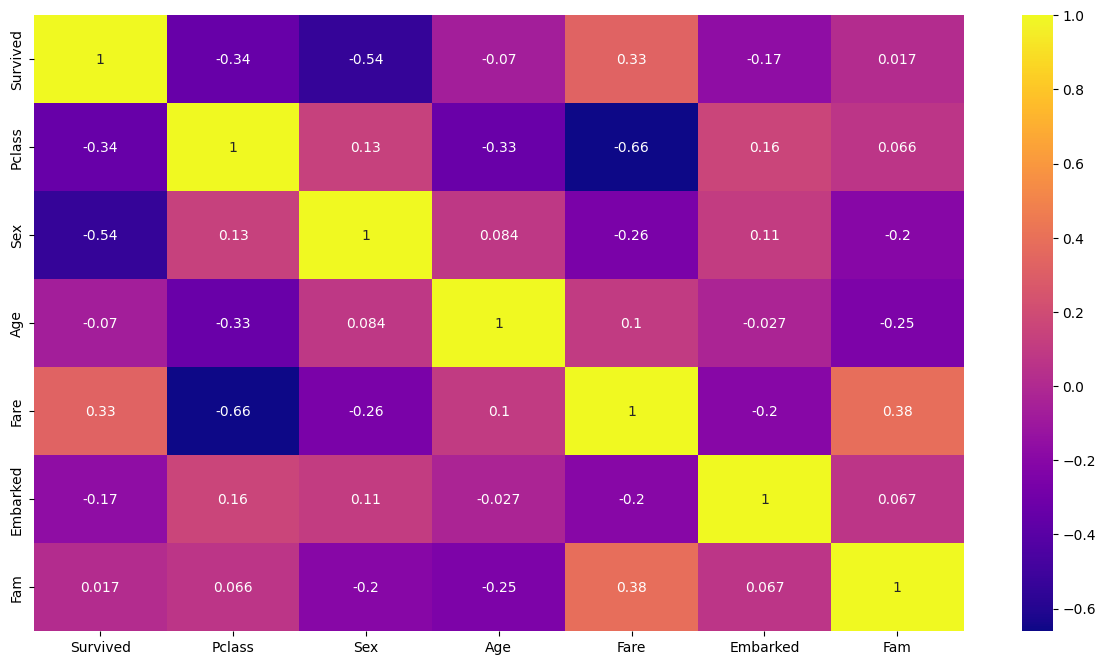

In [339]:
corr = df.corr(numeric_only = True)
plt.figure(figsize =(15,8))
sns.heatmap(corr, annot= True, cmap ='plasma')

We can see that every series are fairly correlated with each other. The colors represent the strength and direction of the correlation, with blue indicating a negative correlation, yellow a positive correlation, and darker colors indicating stronger correlations. For example, the intersection of Age and Survived has a coefficient of -0.54, indicating a moderate negative correlation. This means as age increases, the survival rate tends to decrease. On the other hand, Fare and Fam have a positive correlation of 0.38, suggesting that larger families tend to pay higher fares.

In [340]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam
0,0,3,1,22.0,2.110213,2,1
1,1,1,0,38.0,4.280593,0,1
2,1,3,0,26.0,2.188856,2,0
3,1,1,0,35.0,3.990834,2,1
4,0,3,1,35.0,2.202765,2,0


This is how the data looks after preprocesssing.

##Train-Test Split

In [341]:
X= df.drop(columns = ['Survived'], axis = 1)
y = df['Survived']

In [342]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Fam
0,3,1,22.0,2.110213,2,1
1,1,0,38.0,4.280593,0,1
2,3,0,26.0,2.188856,2,0
3,1,0,35.0,3.990834,2,1
4,3,1,35.0,2.202765,2,0


In [343]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

##Model Training

In [344]:
from sklearn.model_selection import train_test_split
def classify(model):
  x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state = 50)
  model.fit(x_train, y_train)
  print('The accuracy of the model is:', model.score(x_test, y_test))


In [345]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

The accuracy of the model is: 0.8208955223880597


In [346]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

The accuracy of the model is: 0.7686567164179104


In [347]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

The accuracy of the model is: 0.8432835820895522


In [348]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model)

The accuracy of the model is: 0.8208955223880597


In [349]:
from sklearn import svm
model= svm.SVC(kernel = 'linear')
classify(model)

The accuracy of the model is: 0.8059701492537313


In [350]:
from sklearn.neighbors import KNeighborsClassifier
model= svm.SVC(kernel = 'linear')
classify(model)

The accuracy of the model is: 0.8059701492537313


#Neural Network Model


In [351]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=50)

In [353]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(60, activation='relu', input_shape=(6,)),
    layers.Dropout(0.2),
    layers.Dense(30, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [354]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [355]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [356]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=60, validation_data=(X_val, y_val), callbacks=[early_stopping])

#Test loss and test accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy percentage: {accuracy*100}')

Epoch 1/200
10/10 [==============================] - 1s 27ms/step - loss: 1.3418 - accuracy: 0.5325 - val_loss: 0.7205 - val_accuracy: 0.6643
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 1.2830 - accuracy: 0.4991 - val_loss: 0.6389 - val_accuracy: 0.6713
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9969 - accuracy: 0.5782 - val_loss: 0.6752 - val_accuracy: 0.6783
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 1.1295 - accuracy: 0.5325 - val_loss: 0.6076 - val_accuracy: 0.6713
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.9112 - accuracy: 0.5606 - val_loss: 0.6053 - val_accuracy: 0.6853
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.8898 - accuracy: 0.5431 - val_loss: 0.6035 - val_accuracy: 0.6853
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.8434 - accuracy: 0.5729 - val_loss: 0.5971 - val_accuracy: 0.7203
Epoch 8/200
